
# Comparative Sequence Analysis of Top 10 Studied Genes
+ Compare their DNA sequence and Protein (Amino Acid) sequence
  - GC Content
  - Analysis of protein sequence
  - Freq of Each Amino Acids
+ Find similarity between them
    - Alignment
    - hamming distance

+ 3D structure of each gene
### The idea
[An article from nature
](https://www.nature.com/articles/d41586-017-07291-9?WT.ec_id=NEWSDAILY-20171124&amp;utm_source=briefing&amp;utm_medium=email&amp;utm_campaign=20171124)
### Datasource
+ [RCSB PDB](https://www.rcsb.org/) 
+ [NCBI](https://www.ncbi.nlm.nih.gov/) 
+ [Biopython](https://biopython.org/) 
+ [Py3Dmol](http://3dmol.csb.pitt.edu/)
#### Fasta Files
+1.[TP53](https://www.ncbi.nlm.nih.gov/nuccore/NC_000017.11?report=fasta&from=7668421&to=7687490&strand=true) 
+2.[TNF](https://www.ncbi.nlm.nih.gov/nuccore/NC_000006.12?report=fasta&from=31575565&to=31578336)
+3.[EGFR](https://www.ncbi.nlm.nih.gov/nuccore/NC_000007.14?report=fasta&from=55019017&to=55211628)
+4.[VEGFA](https://www.ncbi.nlm.nih.gov/nuccore/NC_000006.12?report=fasta&from=43770209&to=43786487)
+5.[APOE](https://www.ncbi.nlm.nih.gov/nuccore/NC_000019.10?report=fasta&from=44905796&to=44909393)
+6.[IL6](https://www.ncbi.nlm.nih.gov/nuccore/NC_000007.14?report=fasta&from=22725889&to=22732002)
+7.[TGFB1](https://www.ncbi.nlm.nih.gov/nuccore/NC_000019.10?report=fasta&from=41330323&to=41353922&strand=true)
+8.[MTHFR](https://www.ncbi.nlm.nih.gov/nuccore/NC_000001.11?report=fasta&from=11785723&to=11806103&strand=true)
+9.[ESR1](https://www.ncbi.nlm.nih.gov/nuccore/NC_000006.12?report=fasta&from=151654148&to=152129619)
+10.[AKT1](https://www.ncbi.nlm.nih.gov/nuccore/NC_000014.9?report=fasta&from=104769349&to=104795748&strand=true)


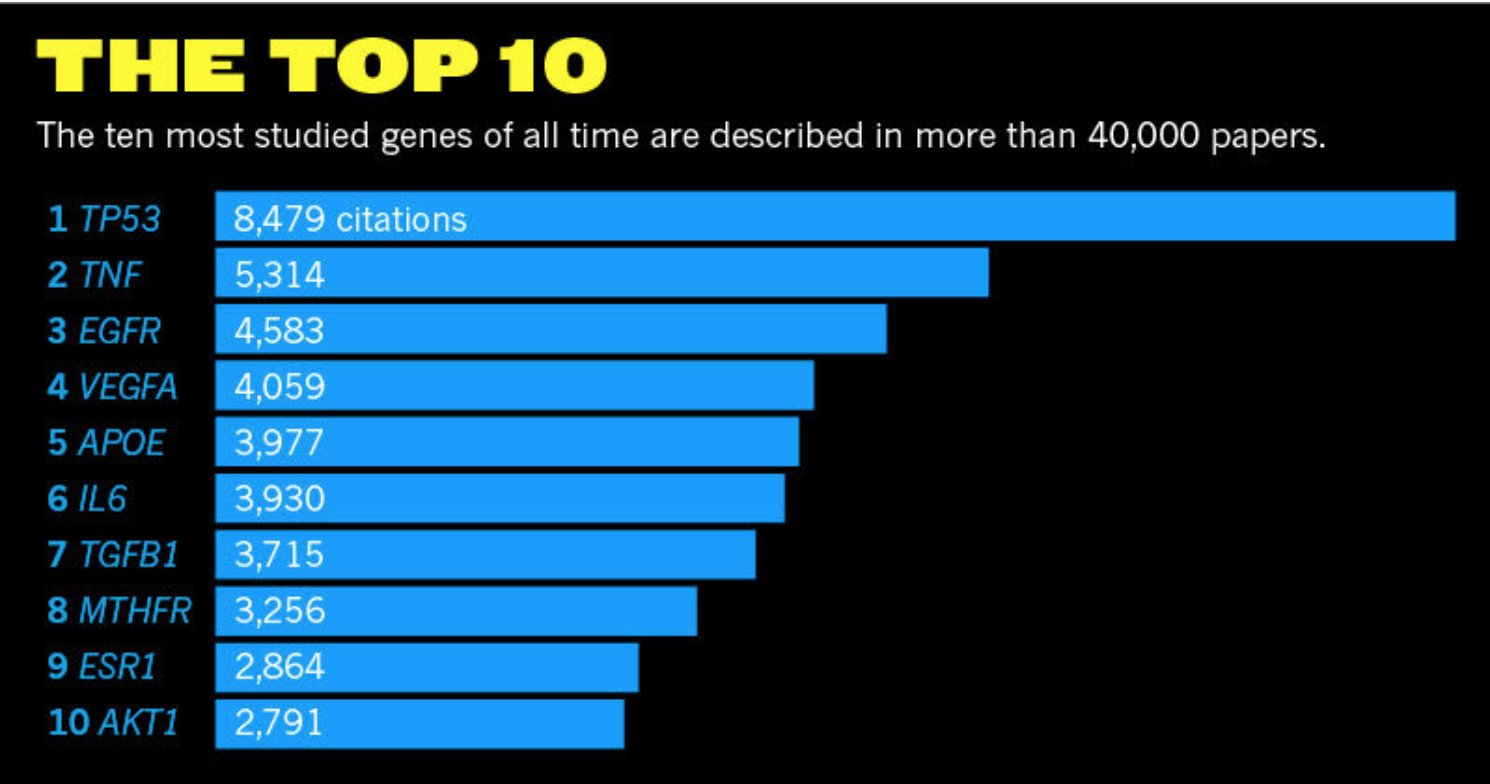

In [32]:
# Load Pkgs
!pip install Bio
from Bio.Seq import Seq


In [33]:
from Bio.SeqUtils import GC

In [34]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [35]:
# Load Data Viz Pkgs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [36]:
# Load 3D structure Viz
!pip install nglview
import nglview as nv

In [37]:
!pip install py3Dmol

import py3Dmol

In [38]:
# Create our sequence 
seq1 = Seq('ACTCGA')
seq2 = Seq('AC')

#### GC Contents In DNA
+ GC-content (or guanine-cytosine content) is the percentage of nitrogenous bases in a DNA or RNA molecule 
that are either guanine (G) or cytosine (C)

#### Usefulness
+ In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their annealing temperature to the template DNA. 
+ A higher GC-content level indicates a relatively higher melting temperature.
+ DNA with low GC-content is less stable than DNA with high GC-content

In [39]:
# Method 1 using GC
GC(seq1)

50.0

In [40]:
# Method 2 using custom fxn
def gc_content(seq):
    result =  float(seq.count('G') + seq.count('C'))/len(seq) * 100
    return result

In [41]:
gc_content(seq1)

50.0

In [42]:
# Method 2 using custom fxn
def gc_content2(seq):
    gc =  [ N for N in seq if N in 'CG']
    result =  float(len(gc))/len(seq) * 100
    return result

In [43]:
gc_content2(seq1)

50.0

#### Alignment Types
+ Global alignment: finds the best concordance/agreement betwenn all characters in two sequences
+ Local Alignment: finds just the subsequences that align the best

In [44]:
alignments = pairwise2.align.globalxx(seq1,seq2)

In [45]:
print(alignments)

[Alignment(seqA='ACTCGA', seqB='A--C--', score=2.0, start=0, end=6), Alignment(seqA='ACTCGA', seqB='AC----', score=2.0, start=0, end=6)]


In [46]:
# To See it well
print(format_alignment(*alignments[0]))

ACTCGA
|  |  
A--C--
  Score=2



In [47]:
# To See second part
print(format_alignment(*alignments[1]))

ACTCGA
||    
AC----
  Score=2



In [48]:
# To see all alignment together using a loop
for a in alignments:
    print(format_alignment(*a))

ACTCGA
|  |  
A--C--
  Score=2

ACTCGA
||    
AC----
  Score=2



In [49]:
# Get only the score for one alignments
alignments2 = pairwise2.align.globalxx(seq1,seq2,one_alignment_only=True,score_only=True)

In [50]:
# Only 2 places
alignments2

2.0

[link text](https://)#### Check for similarity or percentage of similarity
+ fraction of nucleotides that is the same/ total number of nucleotides * 100%


In [51]:
alignments2/len(seq1)*100

33.33333333333333

#### Hamming distance: shows how many places 2 strings differ
+ Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. 
+ In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the othe
+ It is used for error detection or error correction
+ It is used to quantify the similarity of DNA sequences,
+ For checking the edit distance
 - edit distance is a way of quantifying how dissimilar two strings (e.g., words) are to one another by counting the minimum number of operations required to transform one string into the other. 
 - eg Levenshtein distance


In [52]:
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

In [53]:
hamming_distance('ACTTA','ACCTA')

1

In [54]:
hamming_distance(seq1,seq1[::-1])

4

#### Dot Plot
+ A dot plot is a graphical method that allows the comparison of two biological sequences 
and identify regions of close similarity between them.
+ Simplest method - put a dot wherever
sequences are identical 
+ Dot plots compare two sequences by organizing one sequence on the x-axis, and another on the y-axis, of a plot. 
+ When the residues of both sequences match at the same location on the plot, a dot is drawn at the corresponding position

#### usefulness
+ Dot plots can also be used to visually inspect sequences for 
  - direct or inverted repeats
  - regions with low sequence complexity.
  - Similar regions
  - Repeated sequences
  - Sequence rearrangements
  - RNA structures
  - Gene order

+ Link :https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

In [55]:

def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [56]:
# Do A Dot plot
dotplot(seq1,seq2)

 |AC
----
A|■ 
C| ■
T|  
C| ■
G|  
A|■ 


In [57]:
#  Identical proteins will obviously have a diagonal line in the center of the matrix. 
dotplot(Seq('ACCTAG'),Seq('ACCTAG'))

 |ACCTAG
--------
A|■   ■ 
C| ■■   
C| ■■   
T|   ■  
A|■   ■ 
G|     ■


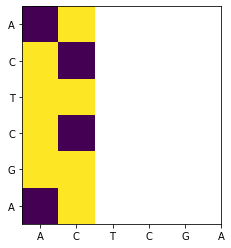

In [58]:
# Add Some fancyness to it
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

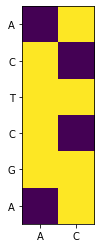

In [59]:
# Plot 
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

In [60]:
# Convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

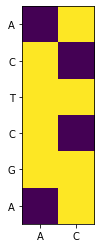

In [61]:
dotplotx(seq1,seq2)

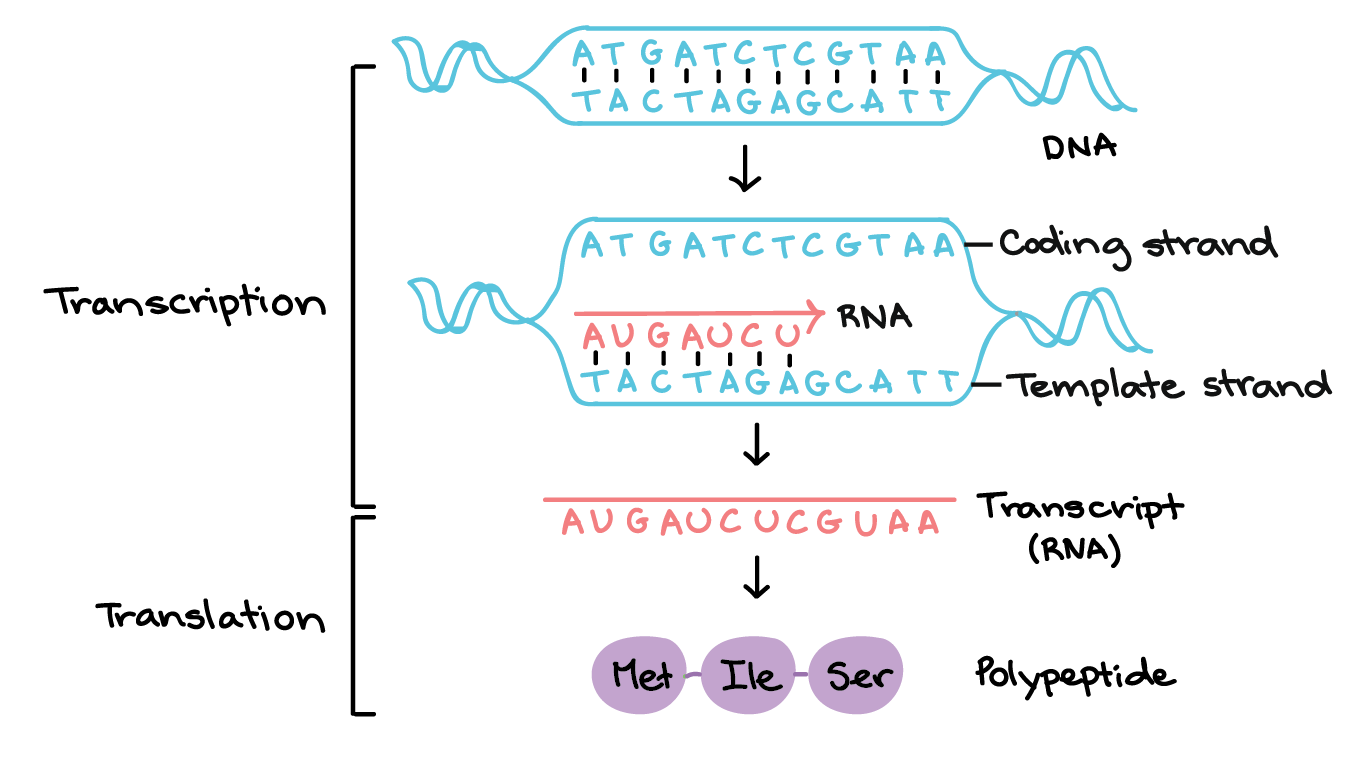

# Comparative Analysis of Top 10 Genes


+ Covid19(SARS-CoV2) is a novel coronavirus identified as the cause of coronavirus disease 2019 (COVID-19) that began in Wuhan, China in late 2019 and spread worldwide.
+ MERS(MERS-CoV) was identified in 2012 as the cause of Middle East respiratory syndrome (MERS).
+ SARS(SARS-CoV) was identified in 2002 as the cause of an outbreak of severe acute respiratory syndrome (SARS).

In [62]:
# Working with Sequences using fasta files
from Bio import SeqIO
TP53 = SeqIO.read('/content/TP53.fasta',"fasta")
TNF = SeqIO.read('/content/TNF.fasta',"fasta")
EGFR = SeqIO.read('/content/EGFR.fasta',"fasta")
VEGFA = SeqIO.read('/content/VEGFA.fasta',"fasta")
APOE = SeqIO.read('/content/APOE.fasta',"fasta")
IL6 = SeqIO.read('/content/IL6.fasta',"fasta")
TGFB1 = SeqIO.read('/content/TGFB1.fasta',"fasta")
MTHFR = SeqIO.read('/content/MTHFR.fasta',"fasta")
ESR1 = SeqIO.read('/content/ESR1.fasta',"fasta")
AKT1 = SeqIO.read('/content/AKT1.fasta',"fasta")

In [63]:
genes=['TP53','TNF','EGFR','VEGFA','APOE','IL6','TGFB1','MTHFR','ESR1','AKT1']
genes_fasta=[TP53,TNF,EGFR,VEGFA,APOE,IL6,TGFB1,MTHFR,ESR1,AKT1]


In [64]:
TP53

SeqRecord(seq=Seq('CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGA...CCA'), id='NC_000017.11:c7687490-7668421', name='NC_000017.11:c7687490-7668421', description='NC_000017.11:c7687490-7668421 Homo sapiens chromosome 17, GRCh38.p13 Primary Assembly', dbxrefs=[])

In [65]:
TNF

SeqRecord(seq=Seq('AGCAGACGCTCCCTCAGCAAGGACAGCAGAGGACCAGCTAAGAGGGAGAGAAGC...AAA'), id='NC_000006.12:31575565-31578336', name='NC_000006.12:31575565-31578336', description='NC_000006.12:31575565-31578336 Homo sapiens chromosome 6, GRCh38.p13 Primary Assembly', dbxrefs=[])

In [66]:
EGFR

SeqRecord(seq=Seq('AGACGTCCGGGCAGCCCCCGGCGCAGCGCGGCCGCAGCAGCCTCCGCCCCCCGC...CAA'), id='NC_000007.14:55019017-55211628', name='NC_000007.14:55019017-55211628', description='NC_000007.14:55019017-55211628 Homo sapiens chromosome 7, GRCh38.p13 Primary Assembly', dbxrefs=[])

In [67]:
# Convert or Get the sequences
tp53_seq = TP53.seq
tnf_seq = TNF.seq
egfr_seq = EGFR.seq
tp53_seq

Seq('CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGA...CCA')

In [68]:
# Check the length of each sequence
print("TP53 seq ::",len(tp53_seq))
print("TNF seq ::",len(tnf_seq))
print("EGFR seq ::",len(egfr_seq))


TP53 seq :: 19070
TNF seq :: 2772
EGFR seq :: 192612


In [69]:
# Check for the GC Content/ Which of them is more heat stable
from Bio.SeqUtils import GC

In [70]:
# Check the length of each sequence
print("GC content of TP53_seq ::",GC(tp53_seq))
print("GC content of TNF_seq ::",GC(tnf_seq))
print("GC content of EGFR_seq ::",GC(egfr_seq))

GC content of TP53_seq :: 49.37598321971683
GC content of TNF_seq :: 52.81385281385281
GC content of EGFR_seq :: 44.56835503499263


In [71]:
seq_counts=[len(TP53.seq),len(TNF.seq),len(EGFR.seq),len(VEGFA.seq),len(APOE.seq),len(IL6.seq),len(TGFB1.seq),len(MTHFR.seq),len(ESR1.seq),len(AKT1.seq)]
fig=px.bar(x=genes,y=seq_counts,title='Sequence Count for each gene',labels={'x':'Gene','y':'Count'},text=seq_counts)
fig.update_traces(textfont_size=13, textangle=0, textposition="outside"
                  ,marker_color='rgb(100,202,225)', marker_line_color='rgb(8,150,150)',
                  marker_line_width=1.5, opacity=0.8,texttemplate='%{text:.2s}')
fig.show()

#### GC Count

In [72]:
gc_counts=list(range(10))
for i in range(10):
  gc_counts[i]+=GC(genes_fasta[i].seq)
fig=px.bar(x=genes,y=gc_counts,title='GC Count for each gene',labels={'x':'Gene','y':'GC Count'},text=gc_counts)
fig.update_traces(textfont_size=13, textangle=0, textposition="outside"
                  ,marker_color='rgb(100,202,225)', marker_line_color='rgb(8,150,150)',
                  marker_line_width=1.5, opacity=0.8,texttemplate='%{text:.2s}')
fig.show()

**AKT1** have the most number of **GC** **->** **73.07%** then **APOE** with **65.06%**

In [73]:
print(genes_fasta)

[SeqRecord(seq=Seq('CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGA...CCA'), id='NC_000017.11:c7687490-7668421', name='NC_000017.11:c7687490-7668421', description='NC_000017.11:c7687490-7668421 Homo sapiens chromosome 17, GRCh38.p13 Primary Assembly', dbxrefs=[]), SeqRecord(seq=Seq('AGCAGACGCTCCCTCAGCAAGGACAGCAGAGGACCAGCTAAGAGGGAGAGAAGC...AAA'), id='NC_000006.12:31575565-31578336', name='NC_000006.12:31575565-31578336', description='NC_000006.12:31575565-31578336 Homo sapiens chromosome 6, GRCh38.p13 Primary Assembly', dbxrefs=[]), SeqRecord(seq=Seq('AGACGTCCGGGCAGCCCCCGGCGCAGCGCGGCCGCAGCAGCCTCCGCCCCCCGC...CAA'), id='NC_000007.14:55019017-55211628', name='NC_000007.14:55019017-55211628', description='NC_000007.14:55019017-55211628 Homo sapiens chromosome 7, GRCh38.p13 Primary Assembly', dbxrefs=[]), SeqRecord(seq=Seq('TCGCGGAGGCTTGGGGCAGCCGGGTAGCTCGGAGGTCGTGGCGCTGGGGGCTAG...AAA'), id='NC_000006.12:43770209-43786487', name='NC_000006.12:43770209-43786487', description='NC_000006.

In [74]:
gene_seq=[]
mrna=[]
for i in range(10):
  gene_seq.append(genes_fasta[i].seq)
for i in range(10):
  mrna.append(gene_seq[i].transcribe())
print(mrna)

[Seq('CUCAAAAGUCUAGAGCCACCGUCCAGGGAGCAGGUAGCUGCUGGGCUCCGGGGA...CCA'), Seq('AGCAGACGCUCCCUCAGCAAGGACAGCAGAGGACCAGCUAAGAGGGAGAGAAGC...AAA'), Seq('AGACGUCCGGGCAGCCCCCGGCGCAGCGCGGCCGCAGCAGCCUCCGCCCCCCGC...CAA'), Seq('UCGCGGAGGCUUGGGGCAGCCGGGUAGCUCGGAGGUCGUGGCGCUGGGGGCUAG...AAA'), Seq('CUACUCAGCCCCAGCGGAGGUGAAGGACGUCCUUCCCCAGGAGCCGGUGAGAAG...GCA'), Seq('ACACCAUGUUUGGUAAAUAAGUGUUUUGGUGUUGUGCAAGGGUCUGGUUUCAGC...CAA'), Seq('GCCGCCGCCGCCCUUCGCGCCCUGGGCCAUCUCCCUCCCACCUCCCUCCGCGGA...CAG'), Seq('AUGACGAUAAAGGCACGGCCUCCAACGAGACCUGUGGGCACGGCCAUGUUGGGG...AAA'), Seq('UAUUGAUUUUUGUGUAAACAUGUGUUUGUAUAUAUCUAUAACGAGAACUCAAGU...AAA'), Seq('GGCGGCGGCAGGACCGAGCGCGGCAGGCGGCUGGCCCAGCGCACGCAGCGCGGC...AAA')]


#### Protein Sequence analysis

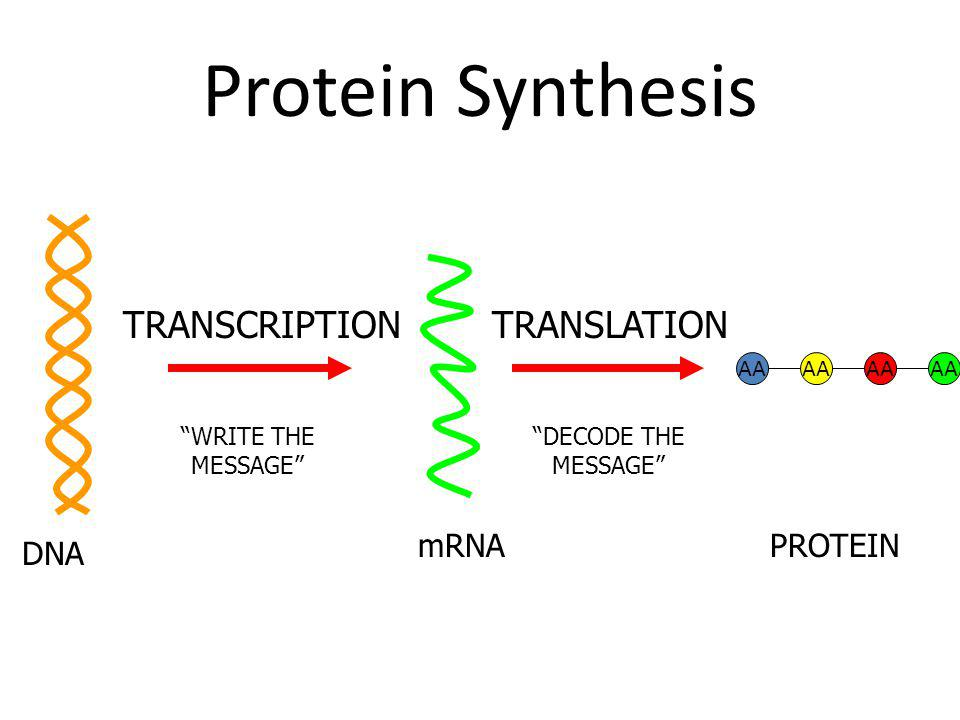

In [75]:
proteins=[]
for i in range(10):
  proteins.append(mrna[i].translate())
print(proteins)

[Seq('LKSLEPPSREQVAAGLRGHFAFGLGACFPRR*HASLDWVSS*LNLMSPL*VTGS...LCC'), Seq('SRRSLSKDSRGPAKRERSNYRPPLKTTLRRHIP*QAARQVLFLSHTDPRLHPLS...EKK'), Seq('RRPGSPRRSAAAAASAPRTV*APDAAEAAGVPS*PRRPPPPRPDDRPPRRRPPE...C*Q'), Seq('SRRLGAAG*LGGRGAGG*HQRSVGRRSG*VDRSADSPARALGAGI*YSLIRVLS...*SQ'), Seq('LLSPSGGEGRPSPGAGEKRSRGHGDELRGL*KELGPWEPLASR*SQESYSGSGL...VSR'), Seq('TPCLVNKCFGVVQGSGFSLKPSQSCLGLWRLEGQPSLEPICMRPRILLQETPS*...IQQ'), Seq('AAAALRALGHLPPTSLRGAARQRGPRPGAGGTPRPGHPPGSEPPAGPASARSGG...QGC'), Seq('MTIKARPPTRPVGTAMLGAGLPVTRAGGFRPVGPPLQQPDTCAAPLHCVPRPCS...*QK'), Seq('Y*FLCKHVFVYIYNENSSHTVILFCKLTFFLYQYIKIIFPHHLTFFLQCNLMAT...KKK'), Seq('GGGRTERGRRLAQRTQRGPKTGAGGRAPSAGHRAPSGGGTRGPAPSSAPARRGL...LFK')]


/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning:

Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.



In [76]:
proteins_len=[]
for i in range(10):
  proteins_len.append(len(proteins[i]))
print(proteins_len)

[6356, 924, 64204, 5426, 1199, 2038, 7866, 6793, 158490, 8800]


In [77]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=genes, y=proteins_len,fill='tonexty',mode='lines',line_color='indigo'))
fig.update_layout(
    title = "<i>Protein length for each gene's protein</i>")

**ESR1** have the most protein length with **158.49k**

>


**EGFR** protein length **64.204k**

#### Check for the Count of Amino Acids
+ ProtParam.ProteinAnalysis
+ Counter from collections

In [78]:
# View the CodonTable
from Bio.Data import CodonTable

In [79]:
# CodonTable for DNA
print(CodonTable.unambiguous_dna_by_name['Standard'])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [80]:
# CodonTable for RNA
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [81]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [82]:
# What the freq of Amino Acids
from collections import Counter

In [83]:
# Most common amino acid in Covid
tp53_freq = Counter(proteins[0])
tnf_freq = Counter(proteins[1])
egfr_freq = Counter(proteins[2])
vegfa_freq = Counter(proteins[3])
apoe_freq = Counter(proteins[4])
il6_freq = Counter(proteins[5])
tgfb1_freq = Counter(proteins[6])
mthfr_freq = Counter(proteins[7])
esr1_freq = Counter(proteins[8])
akt1_freq = Counter(proteins[9])

freq=[tp53_freq,tnf_freq,egfr_freq,vegfa_freq,apoe_freq,il6_freq,tgfb1_freq,mthfr_freq,esr1_freq,akt1_freq]


In [84]:
tp53_freq = Counter(proteins[i])
tp53_freq

Counter({'*': 173,
         'A': 801,
         'C': 403,
         'D': 170,
         'E': 329,
         'F': 177,
         'G': 1211,
         'H': 210,
         'I': 103,
         'K': 140,
         'L': 846,
         'M': 104,
         'N': 65,
         'P': 1005,
         'Q': 346,
         'R': 720,
         'S': 707,
         'T': 345,
         'V': 555,
         'W': 321,
         'Y': 69})

In [85]:
# Most common amino acid in TP53
tp53_freq.most_common(10)

[('G', 1211),
 ('P', 1005),
 ('L', 846),
 ('A', 801),
 ('R', 720),
 ('S', 707),
 ('V', 555),
 ('C', 403),
 ('Q', 346),
 ('T', 345)]

In [86]:
# Most common amino acid in TNF
tnf_freq.most_common(10)

[('L', 96),
 ('S', 91),
 ('G', 79),
 ('R', 73),
 ('P', 72),
 ('T', 56),
 ('E', 51),
 ('A', 47),
 ('K', 45),
 ('Q', 34)]

In [87]:
# Most common amino acid in EGFR
egfr_freq.most_common(10)

[('L', 6982),
 ('S', 5916),
 ('P', 3914),
 ('G', 3695),
 ('V', 3457),
 ('F', 3421),
 ('T', 3380),
 ('R', 3345),
 ('A', 3282),
 ('K', 3168)]

<BarContainer object of 21 artists>

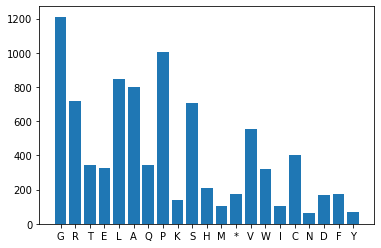

In [88]:
# Plot the Amino Acids
plt.bar(tp53_freq.keys(), tp53_freq.values())

<BarContainer object of 21 artists>

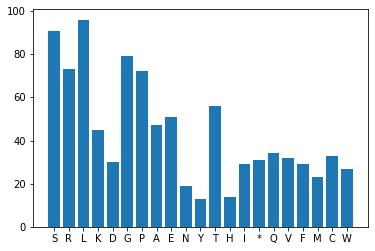

In [89]:
# plot of amino acids
plt.bar(tnf_freq.keys(), tnf_freq.values())

<BarContainer object of 21 artists>

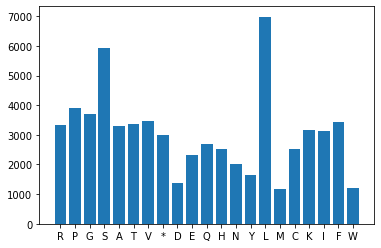

In [90]:
# plot of amino acids
plt.bar(egfr_freq.keys(), egfr_freq.values())

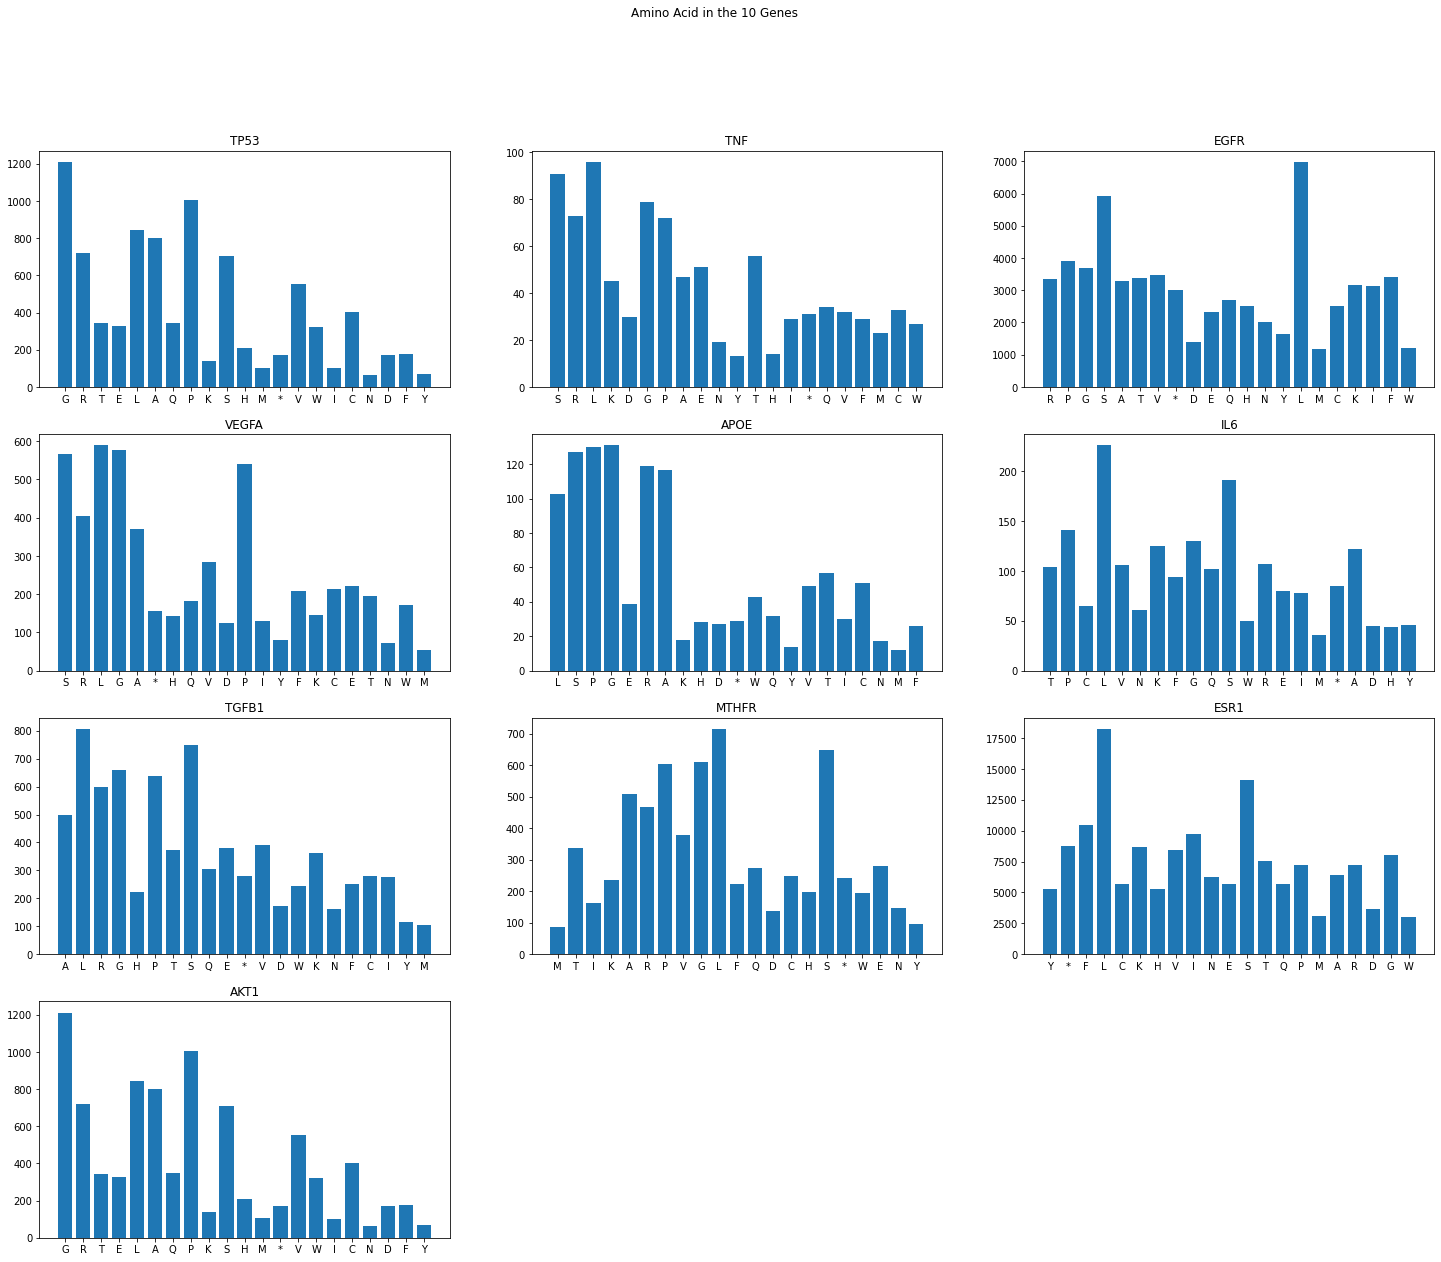

<Figure size 432x288 with 0 Axes>

In [92]:
plt.figure(figsize=(25,20))
plt.subplot(4, 3, 1)
plt.bar(tp53_freq.keys(), tp53_freq.values())
plt.title('TP53')

plt.subplot(4, 3, 2)
plt.bar(tnf_freq.keys(), tnf_freq.values())
plt.title('TNF')

plt.subplot(4, 3, 3)
plt.bar(egfr_freq.keys(), egfr_freq.values())
plt.title('EGFR')

plt.subplot(4, 3, 4)
plt.bar(vegfa_freq.keys(), vegfa_freq.values())
plt.title('VEGFA')

plt.subplot(4, 3, 5)
plt.bar(apoe_freq.keys(), apoe_freq.values())
plt.title('APOE')

plt.subplot(4, 3, 6)
plt.bar(il6_freq.keys(), il6_freq.values())
plt.title('IL6')

plt.subplot(4, 3, 7)
plt.bar(tgfb1_freq.keys(), tgfb1_freq.values())
plt.title('TGFB1')

plt.subplot(4, 3, 8)
plt.bar(mthfr_freq.keys(), mthfr_freq.values())
plt.title('MTHFR')

plt.subplot(4, 3,9)
plt.bar(esr1_freq.keys(), esr1_freq.values())
plt.title('ESR1')

plt.subplot(4, 3, 10)
plt.bar(akt1_freq.keys(), akt1_freq.values())
plt.title('AKT1')
plt.suptitle('Amino Acid in the 10 Genes')
plt.show()
plt.savefig('amino_acid.png')

In [ ]:
# Most Common amino acids
top_amino=[]
for i in range(10):
  top_amino.append(freq[i].most_common(5))
print(top_amino)

[[('L', 674), ('S', 616), ('G', 477), ('P', 464), ('R', 421)], [('L', 96), ('S', 91), ('G', 79), ('R', 73), ('P', 72)], [('L', 6982), ('S', 5916), ('P', 3914), ('G', 3695), ('V', 3457)], [('L', 589), ('G', 577), ('S', 567), ('P', 541), ('R', 404)], [('G', 131), ('P', 130), ('S', 127), ('R', 119), ('A', 117)], [('L', 226), ('S', 191), ('P', 141), ('G', 130), ('K', 125)], [('L', 806), ('S', 749), ('G', 659), ('P', 637), ('R', 597)], [('L', 715), ('S', 649), ('G', 609), ('P', 603), ('A', 508)], [('L', 18225), ('S', 14142), ('F', 10419), ('I', 9754), ('*', 8724)], [('G', 1211), ('P', 1005), ('L', 846), ('A', 801), ('R', 720)]]


Most Common amino acids
+ TP53 -> (**L**, 674), (**S**, 616), (**G**, 477), (**P**, 464), (**R**, 421)
---
+ TNF  -> (**L**, 96), (**S**, 91), (**G**, 79), (**R**, 73), (**P**, 72) 
---
+ EGFR -> (**L**, 6982), (**S**, 5916), (**P**, 3914), (**G**, 3695), (**V**, 3457)
---
+ VEGFA -> (**L**, 589), (**G**, 577), (**S**, 567), (**P**, 541), (**R**, 404) 
---
+ APOE -> (**G**, 131), (**P**, 130), (**S**, 127), (**R**, 119), (**A**, 117)
---
+ IL6 ->  (**L**, 226), (**S**, 191), (**P**, 141), (**G**, 130), (**K**, 125)
---
+ TGFB1 ->  (**L**, 806), (**S**, 749), (**G**, 659), (**P**, 637), (**R**, 597)
---
+ MTHFR ->  (**L**, 715), (**S**, 649), (**G**, 609), (**P**, 603), (**A**, 508) 
---
+ ESR1 ->  (**L**, 18225), (**S**, 14142), (**F**, 10419), (**I**, 9754), (*, 8724)
---
+ AKT1 -> (**G**, 1211), (**P**, 1005), (**L**, 846), (**A**, 801), (**R**, 720)


# Find similarity between them


#### Dot Plot 

In [ ]:
# Compare TP53 and TNF
dotplot(tp53_seq[0:10],tnf_seq[0:10])

 |AGCAGACGCT
------------
C|  ■   ■ ■ 
T|         ■
C|  ■   ■ ■ 
A|■  ■ ■    
A|■  ■ ■    
A|■  ■ ■    
A|■  ■ ■    
G| ■  ■  ■  
T|         ■
C|  ■   ■ ■ 


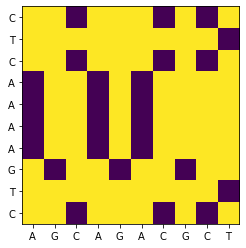

In [ ]:
# Compare TP53 and TNF
dotplotx(tp53_seq[0:10],tnf_seq[0:10])

In [ ]:
# Compare TP53 and EGFR
dotplot(tp53_seq[0:10],egfr_seq[0:10])

 |AGACGTCCGG
------------
C|   ■  ■■  
T|     ■    
C|   ■  ■■  
A|■ ■       
A|■ ■       
A|■ ■       
A|■ ■       
G| ■  ■   ■■
T|     ■    
C|   ■  ■■  


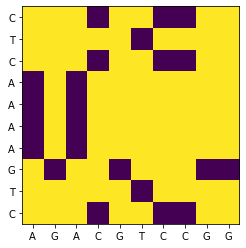

In [ ]:
# Compare TP53 and EGFR
dotplotx(tp53_seq[0:10],egfr_seq[0:10])

*Pairwise alignment between TP53 and VEGFA*

In [ ]:
tp53_n_vegfa = pairwise2.align.globalxx(gene_seq[0][0:100],gene_seq[3][0:100],one_alignment_only=True,score_only=True)
tp53_n_vegfa

68.0

*similarity between TP53 and VEGFA is* **0.35%**

In [ ]:
# Percentage of similarity between them
tp53_n_vegfa/len(gene_seq[0]) *100

0.356581017304667

*Pairwise alignment between TGFB1 and AKT1*

In [ ]:
tgfb1_n_akt1 = pairwise2.align.globalxx(gene_seq[6],gene_seq[9],one_alignment_only=True,score_only=True)
tgfb1_n_akt1

15824.0

*similarity between TGFB1 and AKT1 is* **67%**

In [ ]:
# Percentage of similarity between them
tgfb1_n_akt1/len(gene_seq[6]) *100

67.05084745762711

*Pairwise alignment between TP53 and MTHFR*

In [ ]:
tp53_n_mthfr = pairwise2.align.globalxx(gene_seq[0],gene_seq[7],score_only=True)
tp53_n_mthfr

12698.0

*similarity between TP53 and MTHFR is* **66.5%**

In [ ]:
# Percentage of similarity between them
tp53_n_mthfr/len(gene_seq[0]) *100

66.58626114315679

*Pairwise alignment between MTHFR and VEGFA* 

In [ ]:
mthfr_n_vegfa = pairwise2.align.globalxx(gene_seq[3],gene_seq[7],score_only=True)
mthfr_n_vegfa

11543.0

*similarity between MTHFR and VEGFA is* **70.9%**

In [ ]:
# Percentage of similarity between them
mthfr_n_vegfa/len(gene_seq[3]) *100

70.90730388844524

*Pairwise alignment between MTHFR and VEGFA* 

```
# Google colab limitations 😔
```

In [ ]:
#egfr_n_esr1 = pairwise2.align.globalxx(gene_seq[2][0:len(gene_seq[2])],gene_seq[8][0:len(gene_seq[2])],score_only=True)
#egfr_n_esr1

In [ ]:
egfr_n_esr1 = pairwise2.align.globalxx(gene_seq[2][0:35000],gene_seq[8][0:35000],score_only=True)
egfr_n_esr1

22340.0

*similarity between EGFR and ESR1 for the first 35000 is* **63.82%**

In [ ]:
# Percentage of similarity between them
egfr_n_esr1/len(gene_seq[2][0:35000]) *100

63.82857142857142

*Pairwise alignment between TNF and APOE* 


In [ ]:
tnf_n_epoe = pairwise2.align.globalxx(gene_seq[1],gene_seq[4],score_only=True)
tnf_n_epoe

1972.0

*similarity between TNF and APOE is* **71%**

In [ ]:
# Percentage of similarity between them
tnf_n_epoe/len(gene_seq[1]) *100

71.13997113997114

*Pairwise alignment between APOE and IL6* 



In [ ]:
apoe_n_il6 = pairwise2.align.globalxx(gene_seq[4],gene_seq[5],score_only=True)
apoe_n_il6

2826.0

*similarity between APOE and IL6 is* **78.54%**

In [ ]:
# Percentage of similarity between them
apoe_n_il6/len(gene_seq[4]) *100

78.54363535297388

#### Narative
+ similarity between **APOE** and **IL6** is **78.54%**
+ similarity between **TNF** and **APOE** is **71%**
+ similarity between **MTHFR** and **VEGFA** is **70.9%**
+ similarity between **TGFB1** and **AKT1** is **67%**
+ similarity between **TP53** and **MTHFR** is **66.5%**
+ similarity between **TP53** and **VEGFA** is **0.35%**
---
similarity between **EGFR** and **ESR1** for the **first 35000** is **63.82%**


# 3D Structure

In [ ]:
pdb_id=['4MZR','1TNR','1IVO','4KZN','1B68','1IL6','5VQP','6FCX','3Q95','3O96']

In [ ]:
# 3D Structure
from Bio.PDB import PDBParser,MMCIFParser

In [ ]:
parser = PDBParser()

In [ ]:
view_proteins=[]
for i in range(10):
  view_proteins.append(py3Dmol.view(query='pdb:'+pdb_id[i],viewergrid=(2,2)
  ,style=[[{'stick':{}},{'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}}],
  [{'stick':{'colorscheme':'greenCarbon'}},{'cartoon':{'color':'spectrum'}}]]).setBackgroundColor('#ebf4fb'))

In [ ]:
view_proteins[0]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[1]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[2]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[3]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[4]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[5]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[6]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[7]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[8]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[9]

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
view_proteins[9]
view_proteins[9].addSurface(py3Dmol.VDW,{'opacity':0.7,'colorscheme':{'prop':'b','gradient':'sinebow','min':0,'max':70}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
# Thanks 


In [ ]:
# TP53 (4MZR)
!wget https://files.rcsb.org/download/4MZR.pdb
# TNF (1TNF)
!wget https://files.rcsb.org/download/1TNR.pdb
# EGFR (1IVO)
!wget https://files.rcsb.org/download/1IVO.pdb
# VEGFA (4KZN)
!wget https://files.rcsb.org/download/4KZN.pdb
# APOE (1B68)
!wget https://files.rcsb.org/download/1B68.pdb
# IL6 (1IL6)
!wget https://files.rcsb.org/download/1IL6.pdb
# TGFB1 (5VQP)
!wget https://files.rcsb.org/download/5VQP.pdb
# MTHFR (6FCX)
!wget https://files.rcsb.org/download/6FCX.pdb
# ESR1 (3Q95)
!wget https://files.rcsb.org/download/3Q95.pdb 
# AKT1 (3O96)
!wget https://files.rcsb.org/download/3O96.pdb


--2021-12-30 22:46:32--  https://files.rcsb.org/download/4MZR.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.210.234
Connecting to files.rcsb.org (files.rcsb.org)|132.249.210.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘4MZR.pdb.1’

4MZR.pdb.1              [  <=>               ] 743.40K  2.74MB/s    in 0.3s    

2021-12-30 22:46:33 (2.74 MB/s) - ‘4MZR.pdb.1’ saved [761238]

--2021-12-30 22:46:33--  https://files.rcsb.org/download/1TNR.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.210.234
Connecting to files.rcsb.org (files.rcsb.org)|132.249.210.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1TNR.pdb.1’

1TNR.pdb.1              [  <=>               ] 217.61K  1.02MB/s    in 0.2s    

2021-12-30 22:46:33 (1.02 MB/s) - ‘1TNR.pdb.1’ saved [222831]

--2021-12-30 22:46:34--  https://files.rcsb.org/download/1

In [ ]:
structure=[]
for i in range(10):
  structure.append(parser.get_structure(pdb_id[i], pdb_id[i]+".pdb"))


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning:


/usr/local/lib/python3.7/dist-

In [ ]:
# Chains in the Protein Structure
model = structure[0][0]

In [ ]:
for chain in model:
    print(f'chain {chain},chain_ID: {chain.id}')

chain <Chain id=A>,chain_ID: A
chain <Chain id=B>,chain_ID: B
chain <Chain id=C>,chain_ID: C
chain <Chain id=D>,chain_ID: D
chain <Chain id=K>,chain_ID: K
chain <Chain id=L>,chain_ID: L


In [ ]:
# Check the atoms
for model in structure[0]:
    print(model)
    for chain in model:
        print(chain)
        for residue in chain:
            for atom in residue:
                print(atom)

Streaming output truncated to the last 5000 lines.
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom NE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom CE1>
<Atom CE2>
<Atom CZ>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom NE>
<Atom CZ>
<Atom NH1>
<Atom NH2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom OD1>
<Atom ND2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<Atom OE1>
<Atom OE2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD1>
<Atom CD2>
<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom CB>
<Atom CG>
<Atom CD>
<

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
view_tp53 =  nv.show_biopython(structure[0],gui=True)

In [ ]:
view_tp53

NGLWidget()